# Data Description 

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

**Carat** : Carat weight of the cubic zirconia.

**Cut**:  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

**Color** :  Colour of the cubic zirconia.With D being the best and J the worst.

**Clarity** :  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

**Depth** : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter

**Table** :  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

**Price**:  the Price of the cubic zirconia.

**X** :  Length of the cubic zirconia in mm.

**Y** :  Width of the cubic zirconia in mm.

**Z** :  Height of the cubic zirconia in mm.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data exploring 

In [2]:
data = pd.read_csv("cubic_zirconia.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [4]:
data.drop('Unnamed: 0' , axis = 1  , inplace=True)

In [5]:
data.shape

(26967, 10)

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


# Data Cleanig 

**Duplicated data**

In [9]:
data.duplicated().sum()

34

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
# Now we have no duplicated data 

**Null Values**

In [12]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
#very small number ,i will fill with the mean 

In [14]:
depth_mean = data['depth'].mean()

In [15]:
data['depth'] = data['depth'].fillna(depth_mean)

<AxesSubplot:>

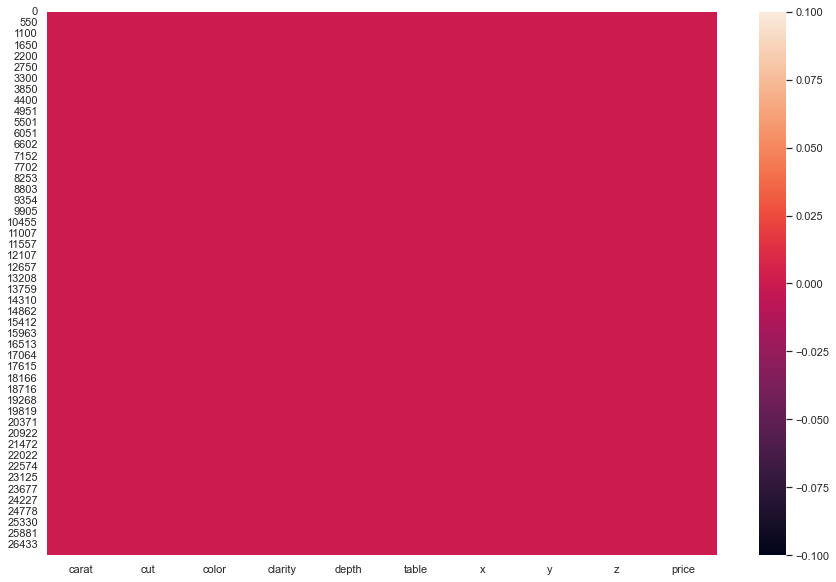

In [16]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.isnull())

In [17]:
#No Null values

In [18]:
data.shape

(26933, 10)

**Outlayers**

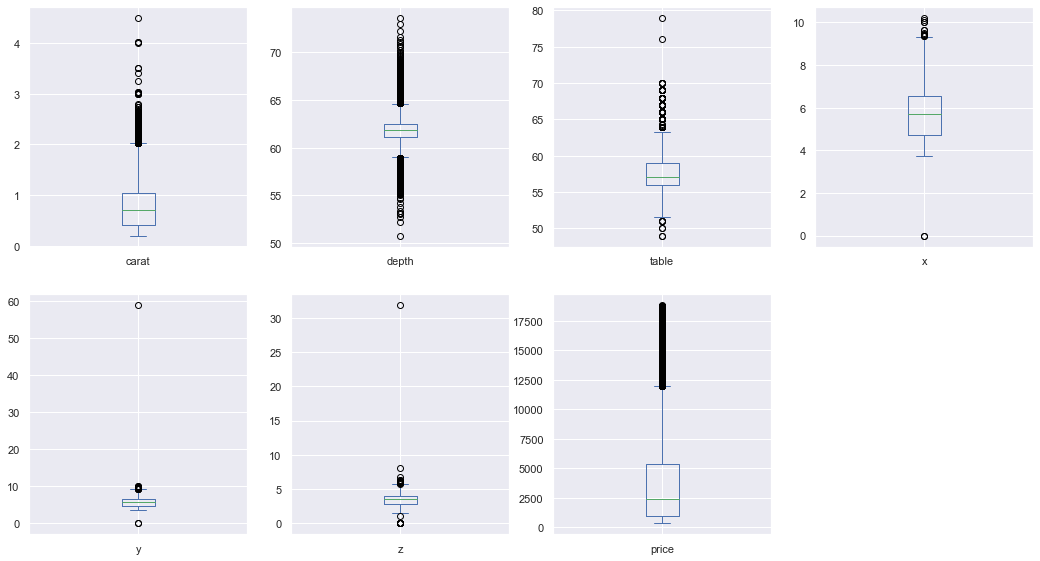

In [19]:
data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

In [20]:
#We can treat with some values and miss the others , but there are very small , in "carat" and "depth" and "table" 

<AxesSubplot:xlabel='carat', ylabel='price'>

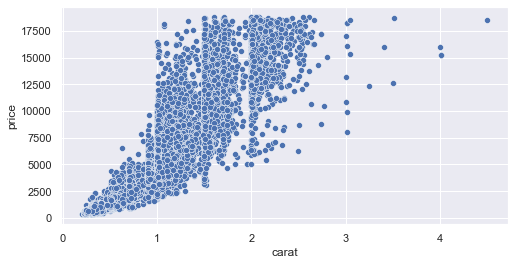

In [21]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.scatterplot(x="carat", y ="price", data = data)

In [22]:
data=data[(data["carat"]<2.7)]

<AxesSubplot:xlabel='carat', ylabel='price'>

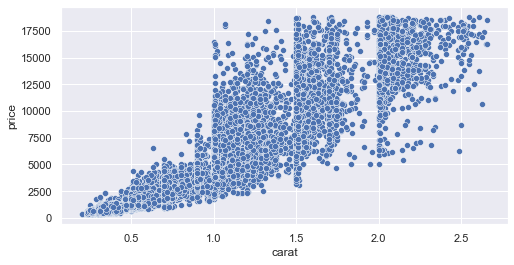

In [23]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.scatterplot(x="carat", y ="price", data = data)

<AxesSubplot:xlabel='depth', ylabel='price'>

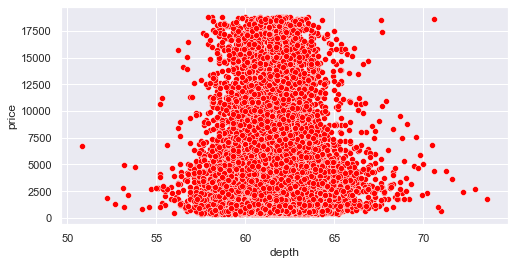

In [24]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.scatterplot(x="depth", y ="price", data = data , color = "Red")

In [25]:
data=data[(data["depth"] <69)&(data["depth"]>55)]

<AxesSubplot:xlabel='depth', ylabel='price'>

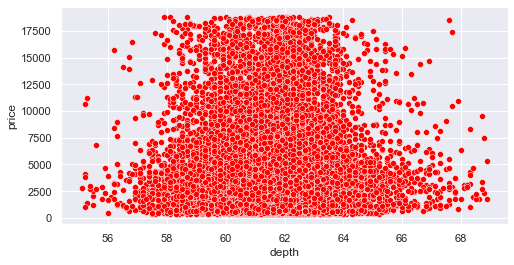

In [26]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.scatterplot(x="depth", y ="price", data = data , color = "Red")

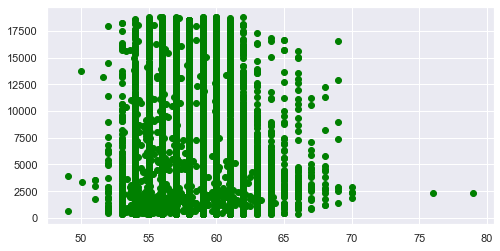

In [27]:
plt.scatter(data['table'] , data["price"] , color = "Green")


In [28]:
data=data[(data["table"] <70)&(data["table"]>52)]

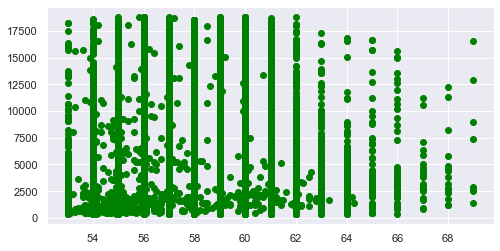

In [29]:
plt.scatter(data['table'] , data["price"] , color = "Green")


In [30]:
data.shape

(26829, 10)

# Data encoding 

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

**Color encoding**

In [32]:
data.color.value_counts()

G    5643
E    4907
F    4706
H    4069
D    3332
I    2743
J    1429
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

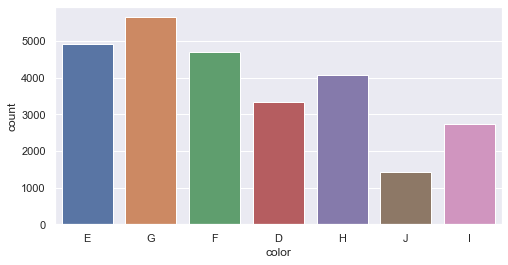

In [33]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x = 'color', data = data)

In [34]:
data['color'] = label.fit_transform(data['color'])

In [35]:
data.color.value_counts()

3    5643
1    4907
2    4706
4    4069
0    3332
5    2743
6    1429
Name: color, dtype: int64

**Cut encoding**

In [36]:
data.cut.value_counts()

Ideal        10800
Premium       6860
Very Good     6014
Good          2427
Fair           728
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='count'>

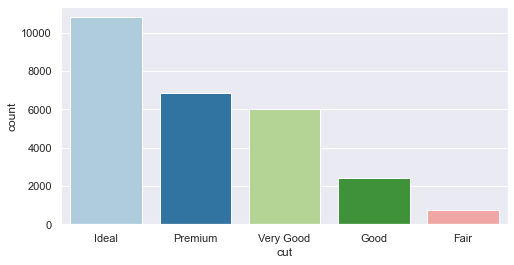

In [37]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x = 'cut', data = data , palette='Paired')

In [38]:
data['cut'] = label.fit_transform(data['cut'])

In [39]:
data.cut.value_counts()

2    10800
3     6860
4     6014
1     2427
0      728
Name: cut, dtype: int64

**Clarity encoding**

In [40]:
data.clarity.value_counts()

SI1     6545
VS2     6080
SI2     4533
VS1     4079
VVS2    2523
VVS1    1837
IF       891
I1       341
Name: clarity, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='count'>

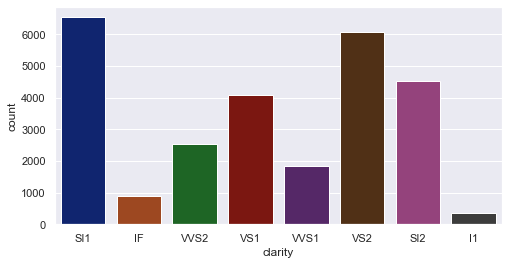

In [41]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x = 'clarity', data = data , palette='dark')

In [42]:
data['clarity'] = label.fit_transform(data['clarity'])

In [43]:
data.clarity.value_counts()

2    6545
5    6080
3    4533
4    4079
7    2523
6    1837
1     891
0     341
Name: clarity, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26829 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26829 non-null  float64
 1   cut      26829 non-null  int32  
 2   color    26829 non-null  int32  
 3   clarity  26829 non-null  int32  
 4   depth    26829 non-null  float64
 5   table    26829 non-null  float64
 6   x        26829 non-null  float64
 7   y        26829 non-null  float64
 8   z        26829 non-null  float64
 9   price    26829 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 1.9 MB


In [45]:
#now all the data are numerical

# Train test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data.drop('price',axis=1).values
y = data['price'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [49]:
X_train.shape , X_test.shape

((20121, 9), (6708, 9))

# Data scalling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [54]:
model=Sequential()

model.add(Dense(9))

#Hidden Layer
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#Output layer

model.add(Dense(1))

In [55]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [56]:
model.fit(x=X_train_scaled, y=y_train, validation_data=(X_test_scaled, y_test),batch_size=250 , epochs=400)

Epoch 1/400
81/81 [==============================] - 2s 8ms/step - loss: 31834556.0000 - mae: 3950.9722 - val_loss: 30422552.0000 - val_mae: 3848.8210
Epoch 2/400
81/81 [==============================] - 0s 4ms/step - loss: 31778052.0000 - mae: 3946.1538 - val_loss: 30303308.0000 - val_mae: 3838.6958
Epoch 3/400
81/81 [==============================] - 0s 3ms/step - loss: 31449968.0000 - mae: 3919.4060 - val_loss: 29655566.0000 - val_mae: 3783.1277
Epoch 4/400
81/81 [==============================] - 0s 4ms/step - loss: 29947324.0000 - mae: 3789.7058 - val_loss: 27043584.0000 - val_mae: 3543.0139
Epoch 5/400
81/81 [==============================] - 0s 3ms/step - loss: 24983498.0000 - mae: 3357.8213 - val_loss: 19734338.0000 - val_mae: 2929.0408
Epoch 6/400
81/81 [==============================] - 0s 3ms/step - loss: 15110031.0000 - mae: 2546.6689 - val_loss: 9397950.0000 - val_mae: 1959.3209
Epoch 7/400
81/81 [==============================] - 0s 4ms/step - loss: 6736302.5000 - mae: 16

81/81 [==============================] - 0s 3ms/step - loss: 1291904.3750 - mae: 606.7719 - val_loss: 1466635.1250 - val_mae: 603.7695
Epoch 57/400
81/81 [==============================] - 0s 3ms/step - loss: 1287076.6250 - mae: 604.6681 - val_loss: 1459074.2500 - val_mae: 600.2147
Epoch 58/400
81/81 [==============================] - 0s 3ms/step - loss: 1282157.7500 - mae: 605.4496 - val_loss: 1456533.2500 - val_mae: 598.2474
Epoch 59/400
81/81 [==============================] - 0s 3ms/step - loss: 1280220.6250 - mae: 603.2070 - val_loss: 1457303.3750 - val_mae: 601.6581
Epoch 60/400
81/81 [==============================] - 0s 3ms/step - loss: 1272858.8750 - mae: 603.4219 - val_loss: 1451978.7500 - val_mae: 597.3148
Epoch 61/400
81/81 [==============================] - 0s 3ms/step - loss: 1274045.6250 - mae: 602.7091 - val_loss: 1449010.2500 - val_mae: 598.9855
Epoch 62/400
81/81 [==============================] - 0s 3ms/step - loss: 1271261.8750 - mae: 602.3384 - val_loss: 1448567.62

81/81 [==============================] - 0s 3ms/step - loss: 1161938.1250 - mae: 582.7330 - val_loss: 1373100.7500 - val_mae: 579.0798
Epoch 112/400
81/81 [==============================] - 0s 3ms/step - loss: 1162369.2500 - mae: 583.4261 - val_loss: 1372470.7500 - val_mae: 578.0884
Epoch 113/400
81/81 [==============================] - 0s 3ms/step - loss: 1158223.3750 - mae: 582.7676 - val_loss: 1381331.8750 - val_mae: 582.8206
Epoch 114/400
81/81 [==============================] - 0s 3ms/step - loss: 1159193.8750 - mae: 583.4615 - val_loss: 1373284.2500 - val_mae: 578.5836
Epoch 115/400
81/81 [==============================] - 0s 3ms/step - loss: 1156659.8750 - mae: 582.2271 - val_loss: 1376395.2500 - val_mae: 580.7368
Epoch 116/400
81/81 [==============================] - 0s 3ms/step - loss: 1157943.1250 - mae: 582.9814 - val_loss: 1377315.8750 - val_mae: 581.4742
Epoch 117/400
81/81 [==============================] - 0s 3ms/step - loss: 1155544.5000 - mae: 582.6555 - val_loss: 1373

81/81 [==============================] - 0s 3ms/step - loss: 1117589.6250 - mae: 577.0797 - val_loss: 1387201.0000 - val_mae: 580.3717
Epoch 167/400
81/81 [==============================] - 0s 3ms/step - loss: 1119199.3750 - mae: 579.0255 - val_loss: 1389045.0000 - val_mae: 579.4583
Epoch 168/400
81/81 [==============================] - 0s 3ms/step - loss: 1118466.0000 - mae: 578.8903 - val_loss: 1378905.8750 - val_mae: 575.1301
Epoch 169/400
81/81 [==============================] - 0s 3ms/step - loss: 1117245.5000 - mae: 578.2388 - val_loss: 1378691.2500 - val_mae: 574.1058
Epoch 170/400
81/81 [==============================] - 0s 4ms/step - loss: 1117851.2500 - mae: 577.9097 - val_loss: 1380929.5000 - val_mae: 577.2673
Epoch 171/400
81/81 [==============================] - 0s 4ms/step - loss: 1117516.6250 - mae: 578.4193 - val_loss: 1380461.8750 - val_mae: 574.5220
Epoch 172/400
81/81 [==============================] - 0s 4ms/step - loss: 1116680.2500 - mae: 577.7241 - val_loss: 1381

81/81 [==============================] - 0s 4ms/step - loss: 1103366.0000 - mae: 572.9543 - val_loss: 1432190.5000 - val_mae: 574.0385
Epoch 222/400
81/81 [==============================] - 0s 4ms/step - loss: 1101889.1250 - mae: 572.5873 - val_loss: 1445039.2500 - val_mae: 574.6216
Epoch 223/400
81/81 [==============================] - 0s 3ms/step - loss: 1101954.0000 - mae: 573.0875 - val_loss: 1427200.1250 - val_mae: 571.1536
Epoch 224/400
81/81 [==============================] - 0s 3ms/step - loss: 1101179.7500 - mae: 572.5148 - val_loss: 1430698.0000 - val_mae: 571.4988
Epoch 225/400
81/81 [==============================] - 0s 3ms/step - loss: 1101478.8750 - mae: 572.6649 - val_loss: 1431169.7500 - val_mae: 571.8018
Epoch 226/400
81/81 [==============================] - 0s 3ms/step - loss: 1100023.3750 - mae: 572.2236 - val_loss: 1431253.2500 - val_mae: 572.1342
Epoch 227/400
81/81 [==============================] - 0s 3ms/step - loss: 1100508.2500 - mae: 572.5823 - val_loss: 1437

81/81 [==============================] - 0s 3ms/step - loss: 1097051.3750 - mae: 570.5546 - val_loss: 1490780.5000 - val_mae: 570.4036
Epoch 277/400
81/81 [==============================] - 0s 3ms/step - loss: 1094960.2500 - mae: 570.2623 - val_loss: 1492061.1250 - val_mae: 569.7545
Epoch 278/400
81/81 [==============================] - 0s 3ms/step - loss: 1097624.3750 - mae: 570.0521 - val_loss: 1494404.7500 - val_mae: 570.4737
Epoch 279/400
81/81 [==============================] - 0s 4ms/step - loss: 1097342.8750 - mae: 570.0774 - val_loss: 1502495.8750 - val_mae: 573.4626
Epoch 280/400
81/81 [==============================] - 0s 4ms/step - loss: 1094046.6250 - mae: 570.0788 - val_loss: 1499117.3750 - val_mae: 571.9876
Epoch 281/400
81/81 [==============================] - 0s 4ms/step - loss: 1096028.3750 - mae: 570.3463 - val_loss: 1496605.0000 - val_mae: 570.1104
Epoch 282/400
81/81 [==============================] - 0s 3ms/step - loss: 1097234.7500 - mae: 570.3248 - val_loss: 1501

81/81 [==============================] - 0s 3ms/step - loss: 1092034.0000 - mae: 568.7165 - val_loss: 1558120.8750 - val_mae: 571.9733
Epoch 332/400
81/81 [==============================] - 0s 3ms/step - loss: 1091649.5000 - mae: 568.4868 - val_loss: 1554565.2500 - val_mae: 569.9126
Epoch 333/400
81/81 [==============================] - 0s 3ms/step - loss: 1092247.1250 - mae: 568.0387 - val_loss: 1552569.5000 - val_mae: 569.8775
Epoch 334/400
81/81 [==============================] - 0s 4ms/step - loss: 1091585.3750 - mae: 567.7534 - val_loss: 1550701.8750 - val_mae: 569.8875
Epoch 335/400
81/81 [==============================] - 0s 3ms/step - loss: 1093041.8750 - mae: 568.1765 - val_loss: 1559338.1250 - val_mae: 571.1807
Epoch 336/400
81/81 [==============================] - 0s 3ms/step - loss: 1091905.5000 - mae: 567.5406 - val_loss: 1554588.8750 - val_mae: 570.8120
Epoch 337/400
81/81 [==============================] - 0s 3ms/step - loss: 1092598.1250 - mae: 568.3494 - val_loss: 1551

81/81 [==============================] - 0s 3ms/step - loss: 1089623.0000 - mae: 566.5510 - val_loss: 1599407.3750 - val_mae: 569.9003
Epoch 387/400
81/81 [==============================] - 0s 3ms/step - loss: 1090547.1250 - mae: 567.9089 - val_loss: 1603457.7500 - val_mae: 570.7029
Epoch 388/400
81/81 [==============================] - 0s 3ms/step - loss: 1090595.6250 - mae: 567.5061 - val_loss: 1606026.7500 - val_mae: 570.4268
Epoch 389/400
81/81 [==============================] - 0s 3ms/step - loss: 1092549.5000 - mae: 567.6317 - val_loss: 1613718.5000 - val_mae: 571.9221
Epoch 390/400
81/81 [==============================] - 0s 3ms/step - loss: 1089937.3750 - mae: 567.3090 - val_loss: 1603283.7500 - val_mae: 571.1535
Epoch 391/400
81/81 [==============================] - 0s 3ms/step - loss: 1090409.3750 - mae: 568.1608 - val_loss: 1596408.6250 - val_mae: 569.6019
Epoch 392/400
81/81 [==============================] - 0s 3ms/step - loss: 1091016.8750 - mae: 567.4323 - val_loss: 1600

In [57]:
losses=pd.DataFrame(model.history.history)

In [58]:
losses.head()

,loss,mae,val_loss,val_mae
0,31834556.0,3950.972168,30422552.0,3848.821045
1,31778052.0,3946.153809,30303308.0,3838.695801
2,31449968.0,3919.406006,29655566.0,3783.127686
3,29947324.0,3789.705811,27043584.0,3543.013916
4,24983498.0,3357.821289,19734338.0,2929.040771


<AxesSubplot:>

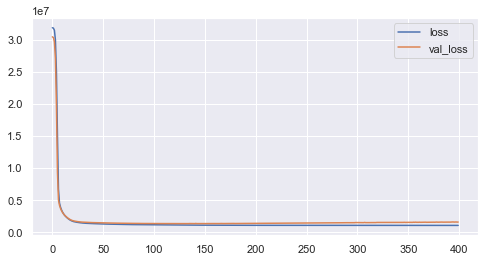

In [59]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

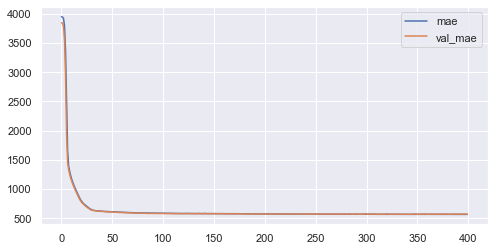

In [60]:
losses[['mae','val_mae']].plot()

In [61]:
predictions=model.predict(X_test_scaled)
predictions

210/210 [==============================] - 1s 1ms/step


array([[ 3056.5774],
       [12608.284 ],
       [ 3591.82  ],
       ...,
       [ 1524.0571],
       [ 6946.424 ],
       [ 1607.8928]], dtype=float32)

In [62]:
score = model.evaluate(X_test_scaled, y_test)

210/210 [==============================] - 0s 2ms/step - loss: 1614090.6250 - mae: 570.5577
